In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load Dataset
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

In [5]:
# Splitting features and labels
X_train = train_data.iloc[:, 1:].values  # Features
y_train = train_data.iloc[:, 0].values   # Labels
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [7]:
# Normalize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [10]:
# Train ANN Model
ann = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=20)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
ann_accuracy = accuracy_score(y_test, y_pred_ann)

In [12]:
# Evaluation
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", knn_accuracy)

print("\nANN Classification Report:")
print(classification_report(y_test, y_pred_ann))
print("ANN Accuracy:", ann_accuracy)


KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

KNN Accuracy: 1.0

ANN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

ANN Accuracy: 1.0


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


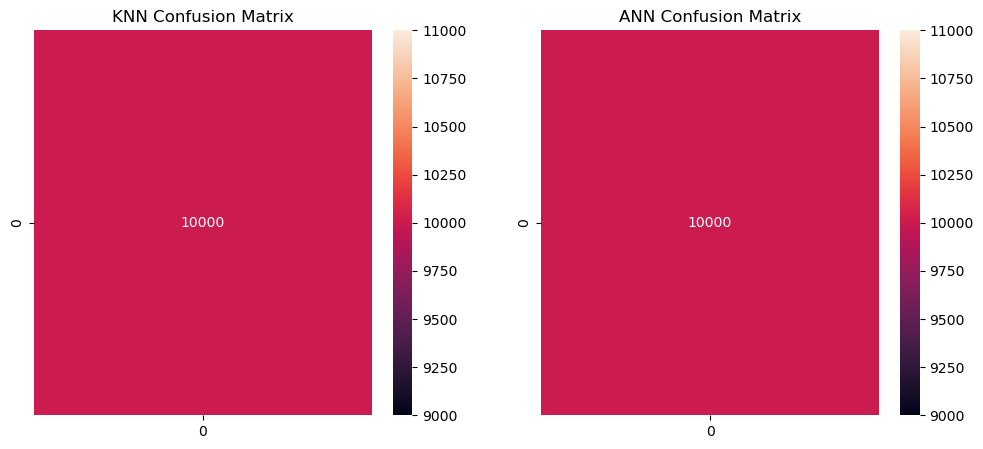

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", ax=axes[0])
axes[0].set_title("KNN Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt="d", ax=axes[1])
axes[1].set_title("ANN Confusion Matrix")
plt.show()

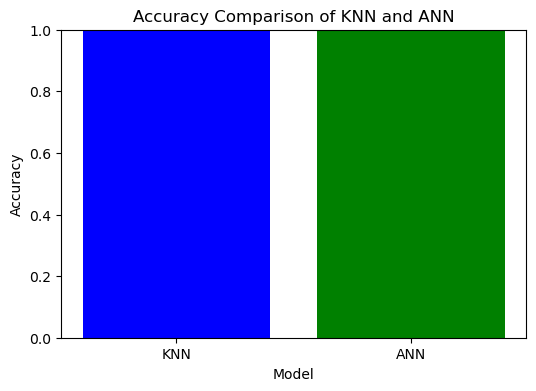

In [17]:
# Accuracy Comparison
models = ['KNN', 'ANN']
accuracies = [knn_accuracy, ann_accuracy]
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of KNN and ANN')
plt.ylim([0, 1])
plt.show()